In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

## Enron Email Dataset
https://www.kaggle.com/wcukierski/enron-email-dataset

In [3]:
data = pd.read_csv('data/enron/emails_small.csv').fillna('')

In [4]:
def filterby_date(df, start_date='1979-01-01', end_date='2005-01-01'):
    return data[(data.date>=start_date)&(data.date<=end_date)].reset_index(drop=True)

def filter_poi(df, poi):
    return df[(df.sender.isin(poi))|(df.recipient1.isin(poi))|(df.recipient2.isin(poi))|(df.recipient3.isin(poi))]

def search_emails(df, query, by_name=True, by_org=False, by_text=False):
    results = pd.DataFrame()
    
    if by_name:
        results = pd.concat([
            results,
            df[df.sender.apply(lambda x: x.split('@')[0]).str.contains(query)]
        ])

    if by_org:
        results = pd.concat([
            results,
            df[df.sender.apply(lambda x: x.split('@')[-1]).str.contains(query)]
        ])

    if by_text:
        results = pd.concat([
            results,
            df[df.text.str.contains(query)]
        ])
    return results.sort_values(by='date').drop_duplicates()

data_view = filterby_date(data, start_date='2001-05-01', end_date='2002-01-01')

In [10]:
# data = data[data.sender!=data.recipient1]

In [11]:
# ne_sends = data[(~data.sender.apply(lambda x: x.split('@')[-1]).str.contains('enron'))].sender
# ne_recs = data[(~data.recipient1.apply(lambda x: x.split('@')[-1]).str.contains('enron'))].recipient1

In [12]:
# ne_send_dict = {ne_sends.iloc[i]:len(data[data.sender==ne_sends.iloc[i]].recipient1.unique()) for i in range(len(ne_sends))}
# ne_rec_dict = {ne_recs.iloc[i]:len(data[data.sender==ne_recs.iloc[i]].recipient1.unique()) for i in range(len(ne_recs))}

In [13]:
# [x for x in sorted(ne_send_dict.items(), key=lambda x: x[1], reverse=True) if x[0].endswith('')]
# [x for x in sorted(ne_rec_dict.items(), key=lambda x: x[1], reverse=True) if x[0].endswith('')]

In [14]:
# from collections import Counter
# Counter(data[(~data.sender.apply(lambda x: x.split('@')[-1]).str.contains('enron'))].sender).most_common(30)
# Counter(data[(~data.recipient1.apply(lambda x: x.split('@')[-1]).str.contains('enron'))].recipient1).most_common(30)

In [67]:
5*50

250

In [68]:
21*24

504

In [15]:
poi = ['coganja@aol', 'stelzer@aol', 'klay@aol', 'hope-frelix@reliantenergy', 'susan_j_neel@reliantenergy']
data_graph = filter_poi(data, poi)

## Graph Models

In [59]:
def fake_invoice():
    return pd.DataFrame({
        'sender':['patrice.mims@enron', 'set@ercot', 'rosalee.fleming@enron'],
        'recipient':['unknown@reliantenergy', 'unknown@reliantenergy', 'unknown@reliantenergy'],
        'date':['2001-02-15', '2001-11-30', '2001-07-08'],
        'amount':[1000.00, 30000.00, 20000.00],
        'type':['invoice', 'invoice', 'invoice']
    })

In [60]:
fake_invoice()

,sender,recipient,date,amount,type
0,patrice.mims@enron,unknown@reliantenergy,2001-02-15,1000.0,invoice
1,set@ercot,unknown@reliantenergy,2001-11-30,30000.0,invoice
2,rosalee.fleming@enron,unknown@reliantenergy,2001-07-08,20000.0,invoice


In [61]:
data_graph

,date,subject,sender,recipient1,recipient2,recipient3,text
425,2001-01-05 05:07:00,Re: Happy New Year,patrice.mims@enron,hope-frelix@reliantenergy,,,"Oh Hope, So nice to hear from you! I think abo..."
1278,2001-01-17 02:05:00,Re: Hi,patrice.mims@enron,hope-frelix@reliantenergy,,,"Hey lady, Just in case you are interested, I c..."
4239,2001-02-15 02:35:00,Re: Hi,patrice.mims@enron,hope-frelix@reliantenergy,,,"So nice to hear from, it is indeed always a pl..."
4310,2001-02-15 07:15:00,Re: Hi,patrice.mims@enron,hope-frelix@reliantenergy,,,"As far as vacation, I think we are thinking of..."
6093,2001-03-07 04:27:00,Re: Hi,patrice.mims@enron,hope-frelix@reliantenergy,,,So nice to hear from you. I miss not being abl...
6714,2001-03-14 01:25:00,Enron Advisory Council,tori.wells@enron,stelzer@aol,,,I am disappointed that Joe Grundfest will not ...
6911,2001-03-15 05:42:00,Re: Enron Advisory Council,rosalee.fleming@enron,stelzer@aol,,,Hi Mr. Stelzer l- I don't believe Ken has had ...
8470,2001-03-30 05:36:00,Re: Jolles,steven.kean@enron,stelzer@aol,,,"I would hold off for now. I think, based on ou..."
9980,2001-04-12 06:10:00,"Re: Hey Ms. ""Got It Going On""",patrice.mims@enron,hope-frelix@reliantenergy,,,"Yes, We're going home to Omaha tomorrow mornin..."
10065,2001-04-12 15:23:00,"Re: Hey Ms. ""Got It Going On""",hope-frelix@reliantenergy,patrice.l.mims@enron,,,You're too sweet. I'm doing the best that I ca...


In [62]:
from graph_utils import make_circos, get_centrality, get_betweenness

In [63]:
G = nx.from_pandas_edgelist(
    data_graph, 
    'sender', 
    'recipient1', 
    edge_attr=['date', 'subject'], 
    create_using=nx.MultiDiGraph
)
nx.set_node_attributes(G, dict(map(lambda x: (x, {'name':x.split('@')[0], 'org': x.split('@')[-1]}), G.nodes)))
nx.set_edge_attributes(G, dict(map(lambda x: (x, {'type':'email'}), G.edges)))

In [64]:
G.add_edges_from(nx.from_pandas_edgelist(
    fake_invoice(), 
    'sender', 
    'recipient', 
    edge_attr=['date', 'amount'], 
    create_using=nx.MultiDiGraph
).edges())

[0, 0, 0]

In [65]:
G.edges

OutMultiEdgeView([('patrice.mims@enron', 'hope-frelix@reliantenergy', 0), ('patrice.mims@enron', 'hope-frelix@reliantenergy', 1), ('patrice.mims@enron', 'hope-frelix@reliantenergy', 2), ('patrice.mims@enron', 'hope-frelix@reliantenergy', 3), ('patrice.mims@enron', 'hope-frelix@reliantenergy', 4), ('patrice.mims@enron', 'hope-frelix@reliantenergy', 5), ('patrice.mims@enron', 'hope-frelix@reliantenergy', 6), ('patrice.mims@enron', 'unknown@reliantenergy', 0), ('hope-frelix@reliantenergy', 'patrice.l.mims@enron', 0), ('hope-frelix@reliantenergy', 'patrice.l.mims@enron', 1), ('hope-frelix@reliantenergy', 'l..mims@enron', 0), ('hope-frelix@reliantenergy', 'l..mims@enron', 1), ('hope-frelix@reliantenergy', 'l..mims@enron', 2), ('hope-frelix@reliantenergy', 'l..mims@enron', 3), ('hope-frelix@reliantenergy', 'l..mims@enron', 4), ('tori.wells@enron', 'stelzer@aol', 0), ('stelzer@aol', 'rosalee.fleming@enron', 0), ('stelzer@aol', 'rosalee.fleming@enron', 1), ('stelzer@aol', 'rosalee.fleming@enro

In [66]:
G.edges[('rosalee.fleming@enron', 'unknown@reliantenergy', 0)]

{}

In [46]:
G.nodes()

NodeView(('patrice.mims@enron', 'hope-frelix@reliantenergy', 'tori.wells@enron', 'stelzer@aol', 'rosalee.fleming@enron', 'steven.kean@enron', 'patrice.l.mims@enron', 'coganja@aol', 'barry.tycholiz@enron', 'cfoster@enron', 'klay@enron', '.ward@enron', 'j..kean@enron', 'skean@enron', 'kimberly.watson@enron', 'l..mims@enron', 'theresa.staab@enron', 'tstaab@enron', 'susan_j_neel@reliantenergy', 'rms@ercot', 'dgbender@aep', 'set@ercot'))

In [45]:
G.edges()

OutMultiEdgeDataView([('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('hope-frelix@reliantenergy', 'patrice.l.mims@enron'), ('hope-frelix@reliantenergy', 'patrice.l.mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('tori.wells@enron', 'stelzer@aol'), ('stelzer@aol', 'rosalee.fleming@enron'), ('stelzer@aol', 'rosalee.fleming@enron'), ('stelzer@aol', 'rosalee.fleming@enron'), ('stelzer@aol', 'klay@enron'), ('stelzer@aol', 'klay@enron'), ('stelzer@aol', 'klay@enron'), (

In [50]:
G.edges[('patrice.mims@enron', 'hope-frelix@reliantenergy', 0)]

{'date': '2001-01-05 05:07:00',
 'subject': 'Re: Happy New Year',
 'type': 'email'}

In [34]:
G.edges()

OutMultiEdgeDataView([('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('patrice.mims@enron', 'hope-frelix@reliantenergy'), ('hope-frelix@reliantenergy', 'patrice.l.mims@enron'), ('hope-frelix@reliantenergy', 'patrice.l.mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('hope-frelix@reliantenergy', 'l..mims@enron'), ('tori.wells@enron', 'stelzer@aol'), ('stelzer@aol', 'rosalee.fleming@enron'), ('stelzer@aol', 'rosalee.fleming@enron'), ('stelzer@aol', 'rosalee.fleming@enron'), ('stelzer@aol', 'klay@enron'), ('stelzer@aol', 'klay@enron'), ('stelzer@aol', 'klay@enron'), (

In [31]:
G.edges[('patrice.mims@enron', 'hope-frelix@reliantenergy')]

ValueError: not enough values to unpack (expected 3, got 2)

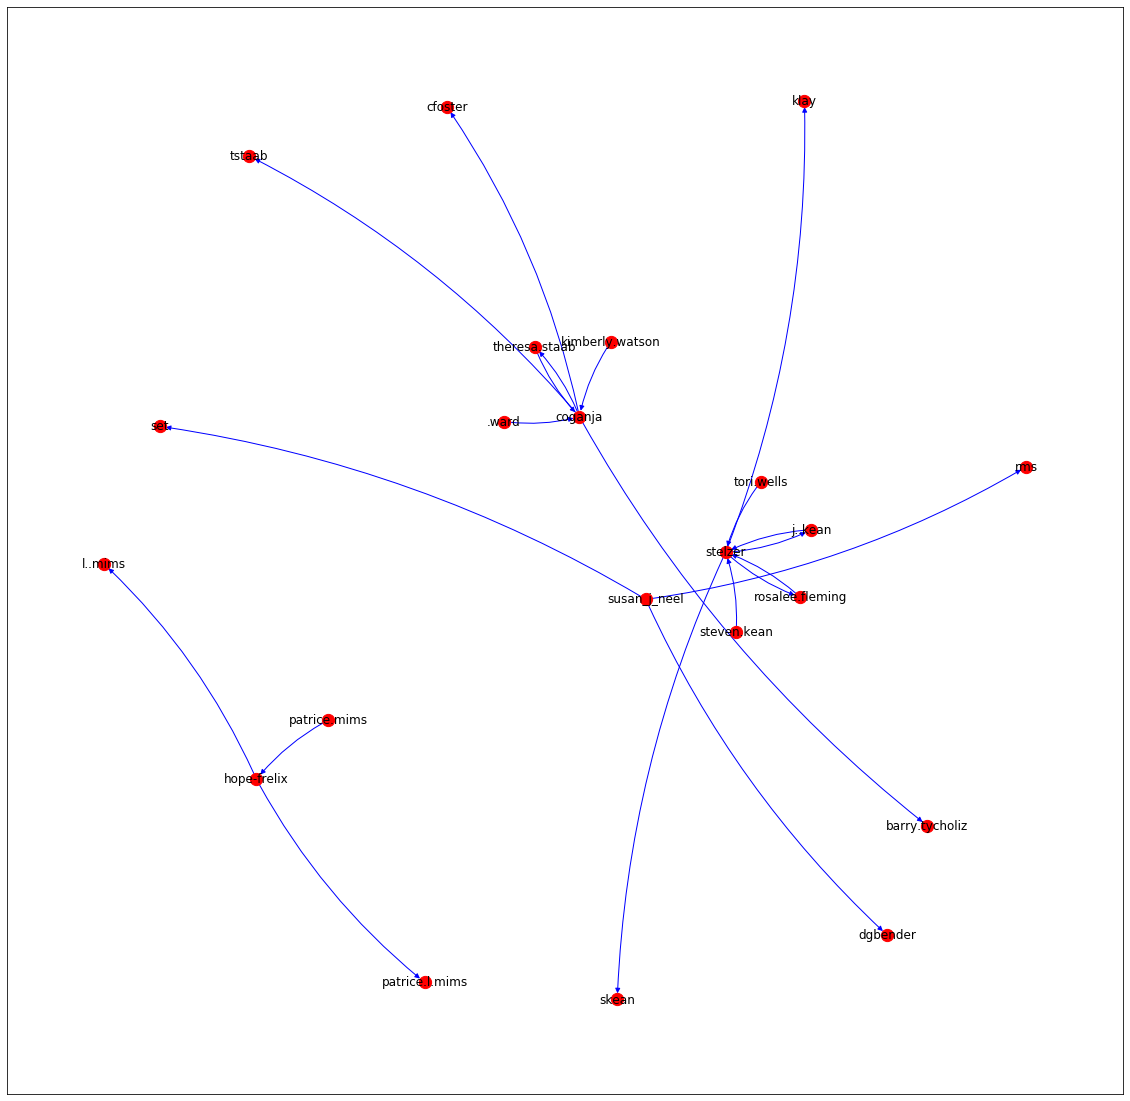

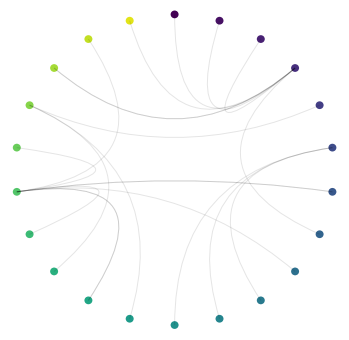

<Figure size 576x576 with 0 Axes>

In [18]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=.3)
names = nx.get_node_attributes(G, 'name')
nx.draw_networkx(G, pos, node_size=150, node_color='red', with_labels=True, edge_color='blue', labels=names, connectionstyle='arc3, rad = 0.1')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
c = make_circos(G, ax)
c.draw()

pass;

In [ ]:
def edges_by_color(G):
    colors

In [22]:
import random
import matplotlib.colors as mcolors

def grouped_layout(G, rad = 3.5):
    random.seed(7)
    colors = list(mcolors.CSS4_COLORS.keys())
    random.shuffle(colors)

    node_network_map = nx.get_node_attributes(G, 'org')
    networks = sorted(list(set(node_network_map.values())))
    color_map = dict(zip(networks, colors[:len(networks)]))
    nodes_by_color = {
        val: [node for node in G if color_map[node_network_map[node]] == val]
        for val in colors
    }
    
    pos = nx.circular_layout(G)   # replaces your original pos=...
    # prep center points (along circle perimeter) for the clusters
    angs = np.linspace(0, 2*np.pi, 1+len(networks))
    repos = []
    
    for ea in angs:
        if ea > 0:
            #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
            repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))

    color_pos = dict(zip(nodes_by_color.keys(), range(len(nodes_by_color))))

    for ea in pos.keys():
        posx = 0

        for c, p in color_pos.items():
            if ea in nodes_by_color[c]:
                posx = p

        #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
        pos[ea] += repos[posx]
    return pos, nodes_by_color

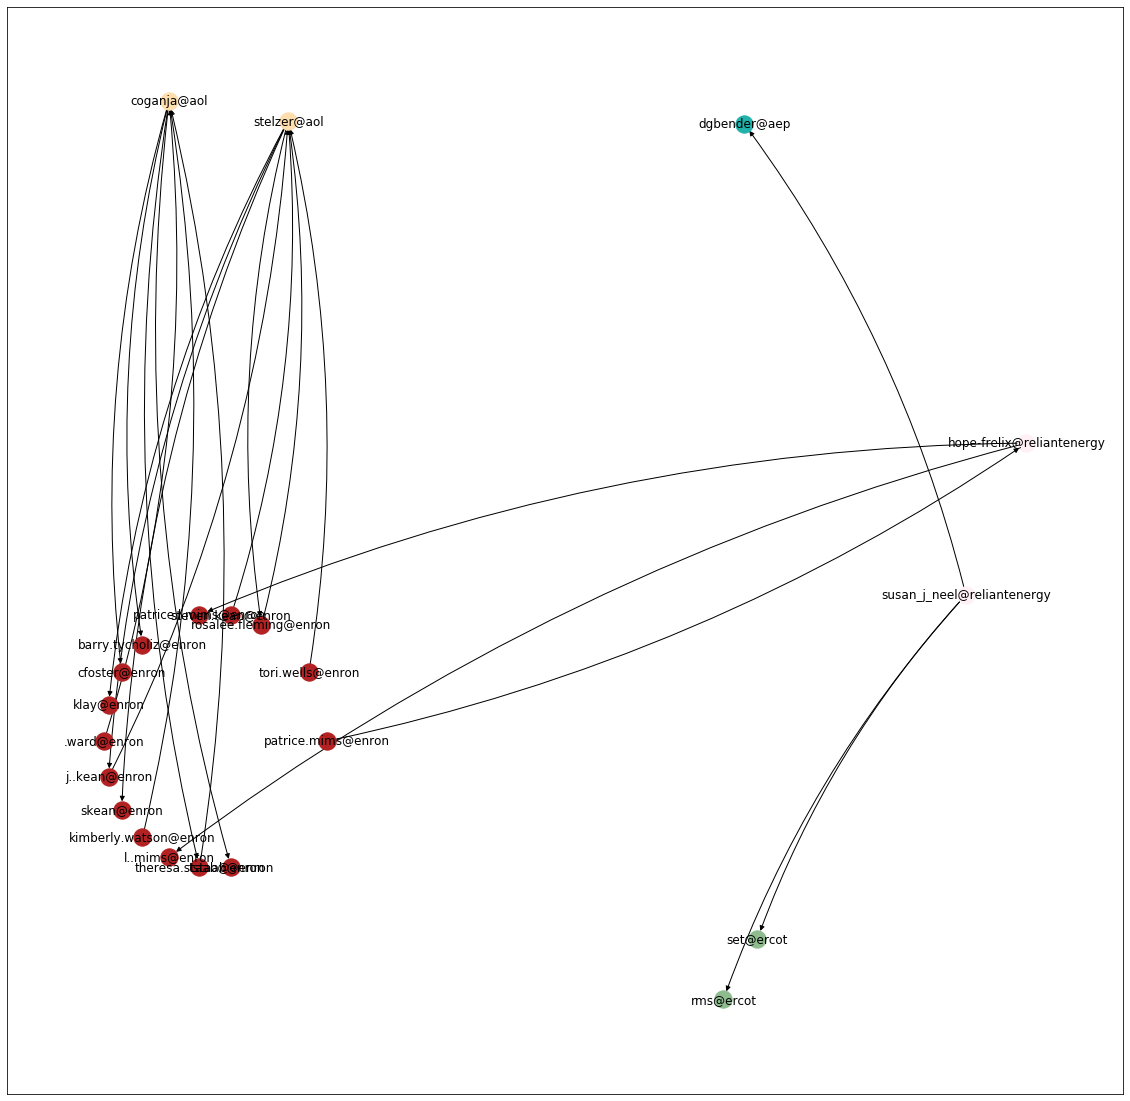

In [23]:
import numpy as np

pos, nodes_by_color = grouped_layout(G, rad=3.5)

#################################
edges = G.edges()

# First draw the nodes 
plt.figure(figsize=(20,20))
for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(G, pos=pos, nodelist=node_names, node_color=color)

# Then draw edges with thickness defined by weights_n
nx.draw_networkx_edges(G, pos=pos, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_labels(G, pos=pos)
plt.show()
pass;

In [53]:
# fig, axs = plt.subplots(2, 1, figsize=(15, 8))

# cent = get_centrality(G)
# centplot = sns.barplot(ax=axs[0], y='centrality', x='name', data=cent.replace({r'\.com$':r''}, regex=True)[:10])
# axs[0].set_xlabel('Degree Centrality')
# axs[0].set_ylabel('')
# axs[0].set_title('Top Degree in Enron Network')
# plt.setp(centplot.get_xticklabels(), rotation=30)

# bet = get_betweenness(G)
# betplot = sns.barplot(ax=axs[1], y='betweenness', x='name', data=bet.replace({r'\.com$':r''}, regex=True)[:10])
# axs[1].set_xlabel('Degree Betweenness Centrality')
# axs[1].set_ylabel('')
# axs[1].set_title('Top Betweenness in Enron Network')
# plt.setp(betplot.get_xticklabels(), rotation=45)

# plt.subplots_adjust(hspace=0.5)
# pass;

In [54]:
from run_clean import name_org

In [55]:
names = nx.get_node_attributes(G, 'name')

['lightseagreen',
 'navajowhite',
 'firebrick',
 'darkseagreen',
 'lavenderblush',
 'darkgreen',
 'darkkhaki',
 'mintcream',
 'olivedrab',
 'greenyellow']

In [68]:
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random

random.seed(0)

# Random string generator
def rand_string(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))


# Set up a nodes and networks randomly
nodes = [rand_string() for _ in range(30)]
networks = [rand_string() for _ in range(5)]
networks_list = networks*6
random.shuffle(networks_list)

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = colors[:5]
color_map = dict(zip(networks, colors))


In [133]:
node_network_map

{'MYNBIQ': 'RNTDIC',
 'PMZJPL': 'AGFWDP',
 'SGQEJE': 'DUGTSD',
 'YDTZIR': 'RNTDIC',
 'WZTEJD': 'AGFWDP',
 'XCVKPR': 'RNTDIC',
 'DLNKTU': 'MCLDBT',
 'GRPOQI': 'DUGTSD',
 'BZRACX': 'DUGTSD',
 'MWZVUA': 'GXZBVA',
 'TPKHXK': 'GXZBVA',
 'WCGSHH': 'MCLDBT',
 'ZEZROC': 'RNTDIC',
 'CKQPDJ': 'DUGTSD',
 'RJWDRK': 'GXZBVA',
 'RGZTRS': 'GXZBVA',
 'JOCTZM': 'MCLDBT',
 'KSHJFG': 'AGFWDP',
 'FBTVIP': 'GXZBVA',
 'CCVYEE': 'AGFWDP',
 'BCWRVM': 'RNTDIC',
 'WQIQZH': 'MCLDBT',
 'GVSNSI': 'MCLDBT',
 'OPVUWZ': 'DUGTSD',
 'LCKTDP': 'GXZBVA',
 'SUKGHA': 'MCLDBT',
 'XIDWHL': 'RNTDIC',
 'ZFKNBD': 'DUGTSD',
 'ZEWHBS': 'AGFWDP',
 'URTVCA': 'AGFWDP'}

In [69]:
color_map

{'DUGTSD': 'lightseagreen',
 'MCLDBT': 'navajowhite',
 'AGFWDP': 'firebrick',
 'GXZBVA': 'darkseagreen',
 'RNTDIC': 'lavenderblush'}

In [70]:
nodes

['MYNBIQ',
 'PMZJPL',
 'SGQEJE',
 'YDTZIR',
 'WZTEJD',
 'XCVKPR',
 'DLNKTU',
 'GRPOQI',
 'BZRACX',
 'MWZVUA',
 'TPKHXK',
 'WCGSHH',
 'ZEZROC',
 'CKQPDJ',
 'RJWDRK',
 'RGZTRS',
 'JOCTZM',
 'KSHJFG',
 'FBTVIP',
 'CCVYEE',
 'BCWRVM',
 'WQIQZH',
 'GVSNSI',
 'OPVUWZ',
 'LCKTDP',
 'SUKGHA',
 'XIDWHL',
 'ZFKNBD',
 'ZEWHBS',
 'URTVCA']

In [71]:
networks

['DUGTSD', 'MCLDBT', 'AGFWDP', 'GXZBVA', 'RNTDIC']

In [72]:
node_network_map

{'MYNBIQ': 'RNTDIC',
 'PMZJPL': 'AGFWDP',
 'SGQEJE': 'DUGTSD',
 'YDTZIR': 'RNTDIC',
 'WZTEJD': 'AGFWDP',
 'XCVKPR': 'RNTDIC',
 'DLNKTU': 'MCLDBT',
 'GRPOQI': 'DUGTSD',
 'BZRACX': 'DUGTSD',
 'MWZVUA': 'GXZBVA',
 'TPKHXK': 'GXZBVA',
 'WCGSHH': 'MCLDBT',
 'ZEZROC': 'RNTDIC',
 'CKQPDJ': 'DUGTSD',
 'RJWDRK': 'GXZBVA',
 'RGZTRS': 'GXZBVA',
 'JOCTZM': 'MCLDBT',
 'KSHJFG': 'AGFWDP',
 'FBTVIP': 'GXZBVA',
 'CCVYEE': 'AGFWDP',
 'BCWRVM': 'RNTDIC',
 'WQIQZH': 'MCLDBT',
 'GVSNSI': 'MCLDBT',
 'OPVUWZ': 'DUGTSD',
 'LCKTDP': 'GXZBVA',
 'SUKGHA': 'MCLDBT',
 'XIDWHL': 'RNTDIC',
 'ZFKNBD': 'DUGTSD',
 'ZEWHBS': 'AGFWDP',
 'URTVCA': 'AGFWDP'}

In [62]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in colors}

In [63]:
nodes_by_color

{'lightseagreen': ['APSFIJ', 'AENRLT', 'VZRMMM', 'DPOPPJ', 'YGZHMX', 'MZWYGP'],
 'navajowhite': ['CFEHVH', 'SKEWQT', 'AYQJUC', 'YHRRYQ', 'XAAZIP', 'PTTAPU'],
 'firebrick': ['UVXBOY', 'KTBDAS', 'CEDXKX', 'IPWFQA', 'GQLEWR', 'ZHGQPL'],
 'darkseagreen': ['GCGOFD', 'ERDLTA', 'KUHTZZ', 'IGWTLO', 'LZUCVD', 'FNZUKC'],
 'lavenderblush': ['MDPUMB', 'CGTMEU', 'ILTLPD', 'WIQLFL', 'ZXLLCH', 'DHPGKG']}

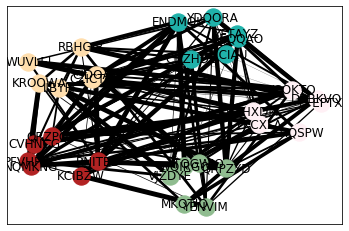

In [64]:
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random


# Random string generator
def rand_string(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))


# Set up a nodes and networks randomly
nodes = [rand_string() for _ in range(30)]
networks = [rand_string() for _ in range(5)]
networks_list = networks*6
random.shuffle(networks_list)

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = colors[:5]
color_map = dict(zip(networks, colors))

graph = nx.Graph()
graph.add_nodes_from(nodes)
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in colors}

# Take random sparse matrix as adjacency matrix
mat = sparse_random(30, 30, density=0.3).todense()
for row, row_val in enumerate(nodes):
    for col, col_val in enumerate(nodes):
        if col > row and mat[row, col] != 0.0: # Stick to upper half triangle, mat is not symmetric
            graph.add_edge(row_val, col_val, weight=mat[row, col])

# Choose a layout to visualize graph
######################## pos = nx.spring_layout(graph)


import numpy as np
pos = nx.circular_layout(graph)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(colors))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
        
color_pos = dict(zip(nodes_by_color.keys(), range(len(nodes_by_color))))

for ea in pos.keys():
    #color = 'black'
    posx = 0
    
    for c, p in color_pos.items():
        
        if ea in nodes_by_color[c]:
            #color = 'green'
            posx = p

    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]


#################################
edges = graph.edges()

# Get the edge weights and normalize them 
weights = [abs(graph[u][v]['weight']) for u, v in edges]
weights_n = [5*float(i)/max(weights) for i in weights] # Change 5 to control thickness

# First draw the nodes 
plt.figure()
for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

# Then draw edges with thickness defined by weights_n
nx.draw_networkx_edges(graph, pos=pos, width=weights_n)
nx.draw_networkx_labels(graph, pos=pos)
plt.show()
pass;

# Embeddings

In [9]:
import re

def emails_to_sentences(data):
    df_dict = {k:[] for k in data.columns}
    df_dict.pop('text')
    idx = []
    sentence = []
    
    for i, row in data.iterrows():
        sents = re.split(r'(?<=[a-z]{2})\.|\?|\!', row.text)
        n_sents = len(sents)
        for k in df_dict.keys():
            df_dict[k].extend([row[k]]+['']*(n_sents-1))
        idx.extend([i]*n_sents)
        sentence.extend(sents)
    df_dict['idx'] = idx
    df_dict['sentence'] = sentence
    return pd.DataFrame(df_dict)

In [10]:
emails_to_sentences(data)

,date,subject,sender,recipient1,recipient2,recipient3,idx,sentence
0,2001-01-01 02:59:00,12/31 Actuals,jeffrey.porter@enron,ena.nominations@enron,,,0,"email problems, No temps yet, same as for cast"
1,2001-01-01 06:23:00,Merry Christmas,ps5@cmu,vince.j.kaminski@enron,,,1,"Dear Mr. Kaminski, In the name of all the MSCF..."
2,,,,,,,1,Thank you very much for taking the time to co...
3,,,,,,,1,It was greatly appreciated
4,,,,,,,1,"Best regards, Pierre"
...,...,...,...,...,...,...,...,...
196357,,,,,,,40961,References: Oak Forest Elementary Betty Polla...
196358,2044-01-04 08:59:46,Trades,cramer@cadvision,john.zufferli@enron,,,40962,"BOM 5th to 31st traded 34, 33.5 , 33.5 and 34 ..."
196359,,,,,,,40962,q2 traded 32 and 31.5. feb dec traded 35 smal...
196360,2044-01-04 14:48:58,trades,cramer@cadvision,john.zufferli@enron,,,40963,"Howdy, bom went out 35 at 35.5 Feb traded 32.7..."


In [28]:
import torch
import dataclasses
from dataclasses import dataclass
from typing import Any, Callable, Dict, List, Optional, Set, Tuple, Union

from transformers import (
    XLNetModel, 
    XLNetPreTrainedModel, 
    BertPreTrainedModel,
    BertModel,
    T5PreTrainedModel,
    T5Model,
    AutoConfig,
    AutoTokenizer,
)

class BertLastHidden(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        self.init_weights()
        
    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        return outputs.last_hidden_state
    
class EmailDataset(torch.utils.data.Dataset):
    def __init__(self, features):
        self.features = features
        self.label_list = [x.label for x in features]

    def __len__(self):
        return len(self.features)

    def __getitem__(self, i):
        return self.features[i]

    def get_labels(self):
        return self.label_list

class EmailDataCollator:
    def __init__(self, config):
        self.config = config
        
    def _tensorize(self, name, features, dtype):
        return torch.tensor([f.__dict__[name] for f in features], dtype=dtype).unsqueeze(-1)
        
    def __call__(self, features):
        first = features[0]
        batch = {}

        for k,v in first.__dict__.items():
            if isinstance(v, str) or v is None:
                pass
            elif k=='label' or k=='seq_mask':
                batch[k] = self._tensorize(k, features, torch.long)
            elif self.config[k].vector=='embedding':
                batch[k] = self._tensorize(k, features, torch.long)
            elif self.config[k].vector=='onehot':
                batch[k] = one_hot(self._tensorize(k, features, torch.long), self.config[k].size).unsqueeze(1)
            elif self.config[k].vector=='linear':
                batch[k] = self._tensorize(k, features, torch.float).unsqueeze(-1)
            else:
                raise ValueError("unknown vectorization scheme {}".format(self.config[k].vector))
                
            if type(v)==list:
                batch[k] = batch[k].squeeze(-1)
        return batch

In [29]:
pooling_parameters = {
    "summary_activation": "tanh",
    "summary_last_dropout": 0.1,
    "summary_type": "mean",
    "summary_use_proj": True
}

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased', cache_dir=None, use_fast=True)
config = AutoConfig.from_pretrained('bert-base-cased', finetuning_task='mnli', cache_dir=None)
config.update(pooling_parameters)

embedding = BertLastHidden.from_pretrained('bert-base-cased', from_tf=False, config=config, cache_dir=None)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertLastHidden: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertLastHidden from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLastHidden from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
testy = [tokenizer(x, padding='max_length', max_length=80, truncation=True) for x in data.text[:10]][0]
testy = {k:[v] for k,v in testy.items()}
testy

{'input_ids': [[101,
   10632,
   2645,
   117,
   1302,
   21359,
   15279,
   1870,
   117,
   1269,
   1112,
   1111,
   2641,
   102,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0]],
 'token_type_ids': [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
  

In [37]:
embedding(**{k:torch.LongTensor(v).to_sparse() if k=='input_ids' else torch.LongTensor(v) for k,v in testy.items()})

RuntimeError: reshape is not implemented for sparse tensors

In [16]:
data

,date,subject,sender,recipient1,recipient2,recipient3,text
0,2001-01-01 02:59:00,12/31 Actuals,jeffrey.porter@enron,ena.nominations@enron,,,"email problems, No temps yet, same as for cast"
1,2001-01-01 06:23:00,Merry Christmas,ps5@cmu,vince.j.kaminski@enron,,,"Dear Mr. Kaminski, In the name of all the MSCF..."
2,2001-01-01 08:36:00,Re: Gas Team - Reorg,john.arnold@enron,edie.leschber@enron,,,that info is correct.
3,2001-01-01 08:36:00,Re:,john.arnold@enron,john.lavorato@enron,,,i would have paid you in full Tueday morning a...
4,2001-01-01 08:55:00,,john.arnold@enron,mike.maggi@enron,,,"if we were open today, where would you open it?"
...,...,...,...,...,...,...,...
40959,2004-02-03 18:19:15,Your code,chaseonlineplus@chase,vladi.pimenov@enron,,,You have requested an authorization code to va...
40960,2004-02-03 18:37:41,Give holiday gifts your personal touch!,1800flowers.215124894@s2u2,rshapiro@enron,,,"Dear Richard, Send personalized holiday treasu..."
40961,2007-02-11 13:32:50,Maud Gordon Elementary Sound,rwalker802@earthlink,kevin.hyatt@enron,,,Here is the sound system proposal. References:...
40962,2044-01-04 08:59:46,Trades,cramer@cadvision,john.zufferli@enron,,,"BOM 5th to 31st traded 34, 33.5 , 33.5 and 34 ..."


In [17]:
[tokenizer(x, padding='max_length', max_length=80, truncation=True) for x in data.text[:10]][0]

{'input_ids': [101, 10632, 2645, 117, 1302, 21359, 15279, 1870, 117, 1269, 1112, 1111, 2641, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [8]:
import logging
from transformers import set_seed, AutoConfig, AutoTokenizer
from transformers.trainer_utils import is_main_process
from src.nlp.glue_utils import (
    ModelArguments, 
    DataTrainingArguments, 
    TrainingArguments, 
    get_labels,
    get_label_to_id,
    GluePreprocessor, 
    AutoPreprocessor,
    ComputeMetrics
)
from datasets import DatasetDict

model_args = ModelArguments(model_name_or_path='bert-base-cased')
data_args = DataTrainingArguments(task_name='mnli', max_seq_length=80)
training_args = TrainingArguments(
    do_train=True, do_eval=True, 
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5, num_train_epochs=4.0,
    output_dir='test_bert_d768_l80',
    overwrite_output_dir=True,
    evaluation_strategy='steps',
    eval_accumulation_steps=1,
    logging_steps=500,
    eval_steps=500,
    local_rank=-1
)

set_seed(9999)

logger = logging.getLogger(__name__)
logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO if is_main_process(training_args.local_rank) else logging.WARN,
    )

tokenizer = AutoTokenizer.from_pretrained(
    model_args.model_name_or_path,
    cache_dir=model_args.cache_dir,
    use_fast=model_args.use_fast_tokenizer,
)

config = AutoConfig.from_pretrained(
    model_args.model_name_or_path,
    finetuning_task=data_args.task_name,
    cache_dir=model_args.cache_dir,
)

dataset_dict = DatasetDict()
dataset_dict = dataset_dict.load_from_disk('data/nli/mnli_snli_hans')

config.update(get_labels(data_args, dataset_dict))
config.update(get_label_to_id(data_args, config))
config.update({
    "summary_activation": "tanh",
    "summary_last_dropout": 0.1,
    "summary_type": "mean",
    "summary_use_proj": True
})

ModuleNotFoundError: No module named 'src'